In [1]:
! pip install --upgrade qiskit qiskit_algorithms

# Importing Required Libraries

In [2]:
import numpy as np
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Estimator
from qiskit.quantum_info import Pauli, SparsePauliOp


# Hamiltonian Defined

In [3]:
# Define the Hamiltonian using Pauli operators
hamiltonian = SparsePauliOp.from_list([
    ("XX", 1.0),  # X_0 X_1 term
    ("YY", 1.0),  # Y_0 Y_1 term
    ("ZI", 1.0)   # Z_0 I_1 term
])

print(hamiltonian)

SparsePauliOp(['XX', 'YY', 'ZI'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j])


# Ansatz Defined

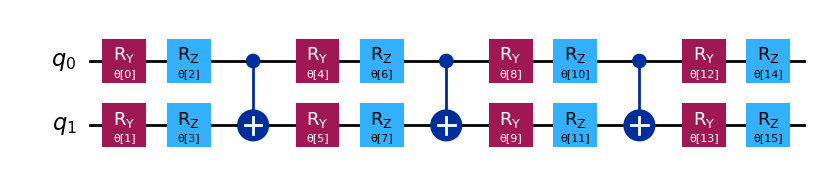

In [4]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(hamiltonian.num_qubits)
ansatz.decompose().draw("mpl", style="iqp")

In [5]:
num_params = ansatz.num_parameters
num_params

16

# Cost Function defined

In [6]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

In [7]:
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [8]:
x0 = 2 * np.pi * np.random.random(num_params)

In [9]:
x0

array([0.75286989, 5.21742098, 2.22377258, 0.80225138, 4.59986347,
       2.40242487, 5.22854184, 4.25315993, 0.78320407, 1.87208156,
       6.02417798, 3.37689835, 5.48213813, 2.11361411, 3.55957563,
       5.92580583])

In [10]:
from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()

In [11]:

result = minimize(cost_func, x0, args=(ansatz,hamiltonian, estimator), method="COBYLA")

result

Iters. done: 1 [Current cost: 1.7454631504951759]
Iters. done: 2 [Current cost: 1.3357843693314158]
Iters. done: 3 [Current cost: 0.537620764767015]
Iters. done: 4 [Current cost: 0.8328342710479608]
Iters. done: 5 [Current cost: 0.46876705062630164]
Iters. done: 6 [Current cost: 0.8888658890438881]
Iters. done: 7 [Current cost: 1.0994559646185376]
Iters. done: 8 [Current cost: 0.851176955403488]
Iters. done: 9 [Current cost: -0.20318883258601217]
Iters. done: 10 [Current cost: -1.0757013232139268]
Iters. done: 11 [Current cost: -0.5149684547983263]
Iters. done: 12 [Current cost: -0.38862729990568207]
Iters. done: 13 [Current cost: -1.8359778176365018]
Iters. done: 14 [Current cost: -1.4052718664881056]
Iters. done: 15 [Current cost: -1.839827749086406]
Iters. done: 16 [Current cost: -0.8313210736977241]
Iters. done: 17 [Current cost: -1.44714677963424]
Iters. done: 18 [Current cost: -0.9268186676715112]
Iters. done: 19 [Current cost: -1.975370509460133]
Iters. done: 20 [Current cost: -

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.2360679737627764
       x: [ 2.468e+00  6.338e+00 ...  3.515e+00  5.604e+00]
    nfev: 283
   maxcv: 0.0

In [14]:
print("Ground State Energy ", result.fun)

Ground State Energy  -2.2360679737627764


# Plotting Results

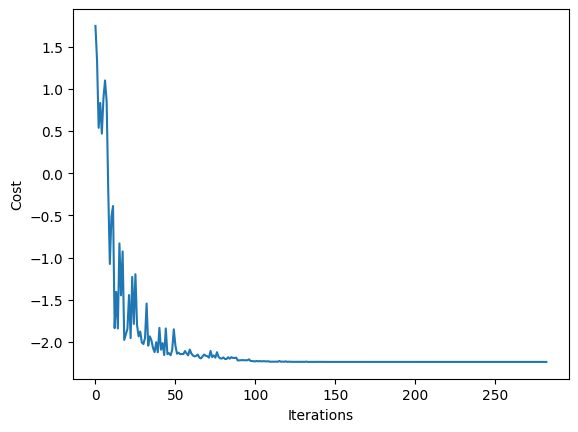

In [21]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

# Result using Inbuilt NumPyMinimumEigensolver

In [19]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit.quantum_info import SparsePauliOp

solver = NumPyMinimumEigensolver()
exact_result = solver.compute_minimum_eigenvalue(hamiltonian)
exact_energy = exact_result.eigenvalue.real

# Step 6: Results and Analysis
print("Exact Ground State Energy:", exact_energy)

Exact Ground State Energy: -2.2360679774997885
